In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.neural_network import MLPClassifier

In [63]:
# the digits dataset of 8x8 pixel image of digits that consist in training and target datasets.
digits = datasets.load_digits()
n_samples = len(digits.images)
dimention = digits.images[0].shape
print("The number of samples in digit dataset is {0:d}, the dimention of each image is {1:d}x{1:d}".format(n_samples,dimention[0]))


The number of samples in digit dataset is 1797, the dimention of each image is 8x8


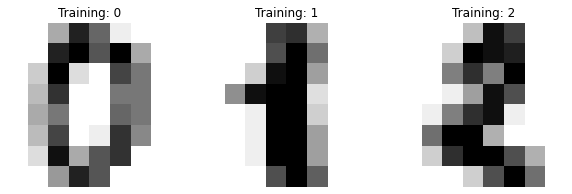

In [64]:
# show the first 3 images
_, fig = plt.subplots(nrows=1, ncols=3, figsize=(10,10))
for ax, image, label in zip(fig, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title("Training: %i" % label)

In [65]:
# reshapeing the images into a vector
data = digits.images.reshape((n_samples,-1))

x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size = 0.2, shuffle=False)

In [66]:
#Train the model MLPC using the training subset
model = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10,12), random_state=1, max_iter=600)

model.fit(x_train,y_train)

prediction = model.predict(x_test)

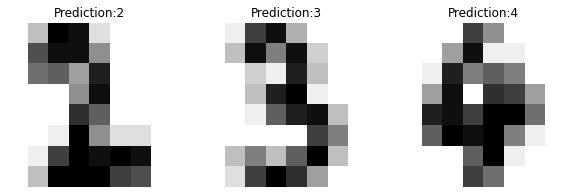

In [67]:
_, fig = plt.subplots(nrows=1, ncols=3, figsize=(10,10))
for ax, image, predicted in zip(fig, x_test, prediction):
    ax.set_axis_off()
    image = image.reshape(8,8)
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(f"Prediction:{predicted}")


In [68]:
# Study the performance of the model
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.77      0.75      0.76        36
           2       0.91      0.91      0.91        35
           3       0.91      0.84      0.87        37
           4       0.92      0.92      0.92        37
           5       0.80      0.95      0.86        37
           6       0.94      0.92      0.93        37
           7       0.94      0.83      0.88        36
           8       0.81      0.76      0.78        33
           9       0.76      0.86      0.81        37

    accuracy                           0.87       360
   macro avg       0.88      0.87      0.87       360
weighted avg       0.88      0.87      0.87       360

